### features:
* selected spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet of level 0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

In [2]:
csv_path = "/Users/ecem/Desktop/gyrocardiogram/multiclass_data/feature_extr"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
features =  pd.read_csv(csv_path + '/pvs-four-diseases-features.csv', index_col = 0)

In [4]:
features

,freq_y1221,freq_z1221,freq_x1222,freq_y1222,freq_z1222,freq_x1223,freq_y1223,freq_z1223,freq_x1224,freq_y1224,...,tempogram_x320,tempogram_y320,tempogram_z320,tempogram_z321,tempogram_y347,tempogram_x348,tempogram_x352,tempogram_x354,tempogram_x361.1,tempogram_z381
0,0.014026,0.013999,0.013981,0.013951,0.014022,0.014187,0.014453,0.014822,0.015264,0.015896,...,8.727423e-08,1.954336e-08,1.871601e-09,1.982309e-17,1.373494e-17,9.927815e-18,6.790674e-18,2.751500e-17,4.852058e-17,-2.479715e-17
1,0.015405,0.015992,0.016581,0.017174,0.017696,0.018073,0.018281,0.018322,0.018224,0.018040,...,8.915791e-08,1.995497e-08,1.909290e-09,1.438934e-17,1.549789e-17,6.849859e-18,1.052664e-17,2.010704e-17,5.231238e-17,-5.587983e-18
2,0.016609,0.016916,0.017323,0.017854,0.018267,0.018491,0.018498,0.018295,0.017925,0.017474,...,9.700728e-08,2.174558e-08,2.083858e-09,4.609669e-17,2.637483e-17,-9.518720e-19,4.654262e-17,3.413615e-17,8.164942e-17,-2.432285e-17
3,0.020885,0.020870,0.021012,0.021085,0.021029,0.020823,0.020487,0.020105,0.019772,0.019452,...,9.519815e-08,2.125941e-08,2.032911e-09,2.034370e-17,-1.792514e-17,4.094538e-18,-7.365256e-18,8.901710e-18,5.936763e-17,-1.653175e-17
4,0.022094,0.022235,0.022077,0.021608,0.020878,0.019931,0.018794,0.017544,0.016320,0.015330,...,9.630758e-08,2.155036e-08,2.061402e-09,1.861191e-17,5.134703e-18,-3.892907e-18,1.496137e-17,4.125030e-17,6.153390e-17,-1.358711e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,0.008834,0.008703,0.008640,0.008656,0.008670,0.008682,0.008716,0.008846,0.009047,0.009295,...,9.514573e-08,2.136252e-08,2.049998e-09,2.101259e-17,-7.301974e-18,7.461034e-21,2.152497e-17,2.705626e-17,5.398507e-17,-3.327739e-17
2102,0.009016,0.008968,0.008968,0.009110,0.009300,0.009528,0.009727,0.009888,0.010040,0.010245,...,9.681752e-08,2.174255e-08,2.085542e-09,3.594063e-17,-1.646009e-17,-8.702274e-18,-2.287602e-17,1.024735e-18,8.706118e-17,-2.912417e-17
2103,0.006566,0.006657,0.006929,0.007282,0.007618,0.007904,0.008120,0.008259,0.008335,0.008392,...,9.611841e-08,2.156786e-08,2.068718e-09,2.423370e-17,-1.127280e-18,6.185212e-18,4.920945e-17,2.753413e-17,8.368139e-17,-4.069871e-17
2104,0.008850,0.008600,0.008461,0.008436,0.008575,0.008874,0.009285,0.009831,0.010457,0.011055,...,9.776432e-08,2.194320e-08,2.105013e-09,2.578664e-17,-1.638909e-18,6.262087e-18,1.429770e-17,2.378048e-17,6.692856e-17,-2.684088e-17


In [5]:
y = np.load("/Users/ecem/Desktop/gyrocardiogram/multiclass_data/data/labels-as-binary.npy")

## With threshold

In [45]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.1)   # düşük  threshold
_ = vt.fit(features)
masked = vt.get_support()
features_masked = features.loc[:, masked]
features_masked # uncomment to see the dataframe

,freq_x1230,freq_y1230,freq_z1230,freq_x1231,freq_y1231,freq_z1231,freq_x1232,freq_y1232,freq_z1232,freq_y1234,...,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,#ofcrossing_x,#ofcrossing_y,#ofcrossing_z
0,0.016587,0.016038,0.015803,0.015678,0.015659,0.015816,0.016174,0.016606,0.017018,0.018432,...,1.683546,1.953521,1.884336,3.337115,2.892143,2.902176,3.054463,315.0,563.0,309.0
1,0.015555,0.014908,0.014114,0.013242,0.012425,0.011731,0.011259,0.011137,0.011237,0.014197,...,2.536577,1.353387,1.348864,1.567292,1.382271,1.446645,1.549479,395.0,498.0,245.0
2,0.021837,0.021902,0.021718,0.021305,0.020735,0.020089,0.019337,0.018517,0.017701,0.013114,...,3.209004,-0.134956,1.253442,0.246203,0.389060,0.444405,0.397022,369.0,552.0,298.0
3,0.017253,0.016591,0.016218,0.016134,0.016155,0.016152,0.016067,0.015883,0.015625,0.015167,...,0.332423,2.512636,1.868316,1.286057,1.486791,1.487241,1.411369,322.0,525.0,291.0
4,0.016221,0.016060,0.015969,0.016074,0.016343,0.016606,0.016832,0.017040,0.017375,0.017936,...,2.255243,1.461551,1.337653,3.555023,3.041664,2.981505,3.120505,312.0,524.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,0.010704,0.010761,0.010886,0.011073,0.011309,0.011621,0.012053,0.012566,0.013057,0.014116,...,-0.206653,-0.175639,-0.956635,-0.977654,-0.954696,-0.949013,-0.922854,187.0,245.0,402.0
2102,0.009247,0.009588,0.009956,0.010337,0.010740,0.011155,0.011563,0.011961,0.012342,0.012534,...,0.619744,0.322873,0.318044,-0.032990,0.007116,0.036962,0.042782,161.0,204.0,431.0
2103,0.010340,0.010488,0.010620,0.010789,0.011056,0.011371,0.011674,0.011917,0.012065,0.011124,...,-0.542842,-0.112488,-0.638902,-1.010991,-0.917975,-0.897326,-0.906142,175.0,223.0,473.0
2104,0.010632,0.010995,0.011382,0.011759,0.012151,0.012536,0.012849,0.013063,0.013180,0.011671,...,0.329681,-0.059718,0.213193,0.465949,0.449462,0.418689,0.400873,161.0,202.0,434.0


In [46]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [47]:
import xgboost as xgb
classifier = MultiOutputClassifier(xgb.XGBClassifier(objective = 'binary:logistic'))

clf = Pipeline([('classify', classifier)])


In [48]:
clf.fit(X_train_, y_train_)


Pipeline(steps=[('classify',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None, ...)))])

In [49]:
yhat = clf.predict(X_valid_)

In [50]:
df_results_test = pd.DataFrame({'AR': y_valid_[:,0], 'AS': y_valid_[:,1], 'MR': y_valid_[:,2], 'MS': y_valid_[:,3],
                        'predicted AR': yhat[:,0],
                          'predicted AS': yhat[:,1],
                          'predicted MR': yhat[:,2], 
                          'predicted MS': yhat[:,3]})
df_results_test

,AR,AS,MR,MS,predicted AR,predicted AS,predicted MR,predicted MS
0,0,0,0,1,0,0,0,1
1,1,1,1,1,1,1,1,1
2,1,1,1,0,1,1,1,0
3,0,1,1,0,0,1,1,0
4,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
417,1,0,0,0,1,0,0,0
418,0,0,1,0,0,0,1,0
419,1,0,0,0,1,0,0,0
420,0,0,1,0,0,0,1,0


In [51]:
auc_y1 = roc_auc_score(y_valid_[:,0],yhat[:,0])
auc_y2 = roc_auc_score(y_valid_[:,1],yhat[:,1])
auc_y3 = roc_auc_score(y_valid_[:,2],yhat[:,2])
auc_y4 = roc_auc_score(y_valid_[:,3],yhat[:,3])

print("ROC AUC AR: %.4f, AS: %.4f, MR: %.4f, MS: %.4f " % (auc_y1, auc_y2, auc_y3, auc_y4))

ROC AUC AR: 0.9566, AS: 0.9842, MR: 0.9692, MS: 0.9318 


In [52]:
weighted_roc_auc_ovo = roc_auc_score(
    y_valid_, yhat, multi_class="ovr", average="weighted"
)

In [53]:
weighted_roc_auc_ovo

0.9645290132681512

In [57]:
feature_important = clf.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

AttributeError: 'Pipeline' object has no attribute 'get_score'

In [54]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


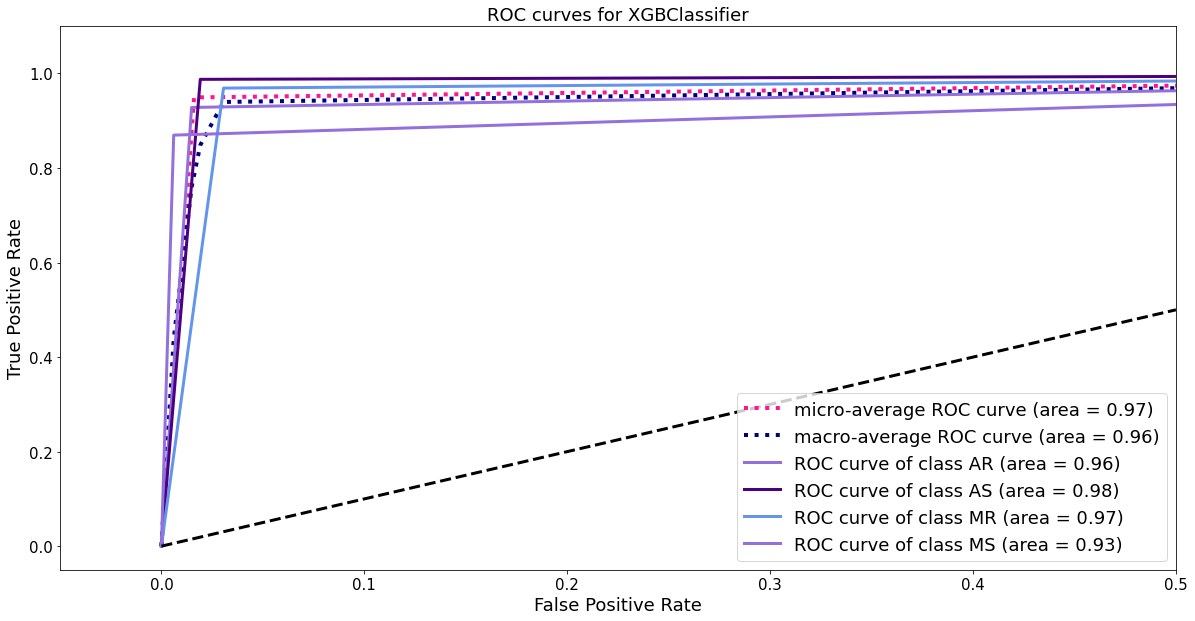

In [55]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid_[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid_.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 4
class_names = ["AR", "AS", "MR", "MS"]

from itertools import cycle
lw =3

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20, 10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["mediumpurple", "indigo", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0.0, 0.5], [0.0, 0.5], "k--", lw=lw)
plt.xlim([-0.05, 0.5])
plt.xticks(fontsize=15)
plt.ylim([-0.05, 1.1])
plt.yticks(fontsize=15)
plt.xlabel("False Positive Rate",fontsize = 18 )
plt.ylabel("True Positive Rate", fontsize = 18)
plt.title("ROC curves for XGBClassifier",fontsize = 18)
plt.legend(loc="lower right", fontsize = 18) 
plt.show()

In [56]:
cm_y1 = confusion_matrix(y_valid_[:,0],yhat[:,0])
cm_y2 = confusion_matrix(y_valid_[:,1],yhat[:,1])
cm_y3 = confusion_matrix(y_valid_[:,2],yhat[:,2])
cm_y4 = confusion_matrix(y_valid_[:,3],yhat[:,3])
print(cm_y1)



[[265   4]
 [ 11 142]]


In [18]:
class_dict = {0:'AR', 1:'AS', 2:'MR', 3:'MS'}

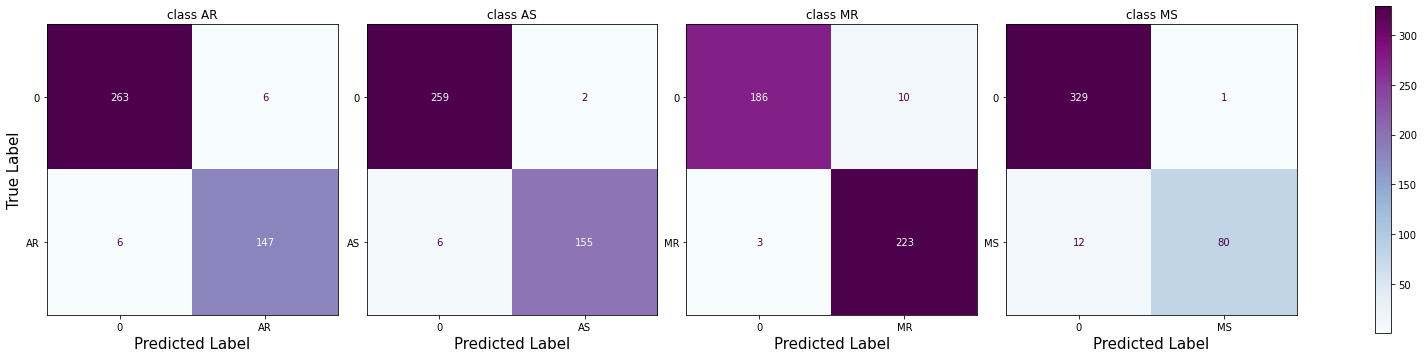

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

f, axes = plt.subplots(1, 4, figsize=(28, 15))
axes = axes.ravel()
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_valid_[:, i],
                                                   yhat[:, i]),
                                  display_labels=[0, i])
    if i == 0:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel('True Label', fontsize = 15)
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
    else:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel(' ')
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
        

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes, shrink= 0.4)
plt.show()

In [20]:
cm_y2

array([[259,   2],
       [  6, 155]])

In [21]:
cm_y3

array([[186,  10],
       [  3, 223]])

In [22]:
cm_y4

array([[329,   1],
       [ 12,  80]])

In [23]:
cr_y1 = classification_report(y_valid_[:,0],yhat[:,0]) # AR
cr_y2 = classification_report(y_valid_[:,1],yhat[:,1]) # AS
cr_y3 = classification_report(y_valid_[:,2],yhat[:,2]) # MR
cr_y4 = classification_report(y_valid_[:,3],yhat[:,3]) # MS

print (cr_y1)
print (cr_y2)
print (cr_y3)
print (cr_y4)




              precision    recall  f1-score   support

           0       0.98      0.98      0.98       269
           1       0.96      0.96      0.96       153

    accuracy                           0.97       422
   macro avg       0.97      0.97      0.97       422
weighted avg       0.97      0.97      0.97       422

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       261
           1       0.99      0.96      0.97       161

    accuracy                           0.98       422
   macro avg       0.98      0.98      0.98       422
weighted avg       0.98      0.98      0.98       422

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       196
           1       0.96      0.99      0.97       226

    accuracy                           0.97       422
   macro avg       0.97      0.97      0.97       422
weighted avg       0.97      0.97      0.97       422

              preci

In [24]:
y_valid_a = pd.DataFrame(y_valid_)
y_train_a = pd.DataFrame(y_train_)

X_valid_a = pd.DataFrame(X_valid_)
X_train_a = pd.DataFrame(X_train_)

## Without threshold

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(features, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [26]:
classifier_f = MultiOutputClassifier(xgb.XGBClassifier(objective = 'binary:logistic'))

clf_f = Pipeline([('classify', classifier)])

clf_f.fit(X_train, y_train)

yhat_f = clf.predict(X_valid)

In [27]:
df_results_test_f = pd.DataFrame({'AR': y_valid[:,0], 'AS': y_valid[:,1], 'MR': y_valid[:,2], 'MS': y_valid[:,3],
                        'predicted AR': yhat_f[:,0],
                          'predicted AS': yhat_f[:,1],
                          'predicted MR': yhat_f[:,2], 
                          'predicted MS': yhat_f[:,3]})
df_results_test_f

,AR,AS,MR,MS,predicted AR,predicted AS,predicted MR,predicted MS
0,0,0,0,1,0,0,0,1
1,1,1,1,1,1,1,1,1
2,1,1,1,0,1,1,1,0
3,0,1,1,0,0,1,1,0
4,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
417,1,0,0,0,1,0,0,0
418,0,0,1,0,0,0,1,0
419,1,0,0,0,1,0,0,0
420,0,0,1,0,0,0,1,0


In [28]:
auc_y1_ = roc_auc_score(y_valid[:,0],yhat_f[:,0])
auc_y2_ = roc_auc_score(y_valid[:,1],yhat_f[:,1])
auc_y3_ = roc_auc_score(y_valid[:,2],yhat_f[:,2])
auc_y4_ = roc_auc_score(y_valid[:,3],yhat_f[:,3])

print("ROC AUC AR: %.4f, AS: %.4f, MR: %.4f, MS: %.4f " % (auc_y1_, auc_y2_, auc_y3_, auc_y4_))

ROC AUC AR: 0.9697, AS: 0.9795, MR: 0.9605, MS: 0.9302 


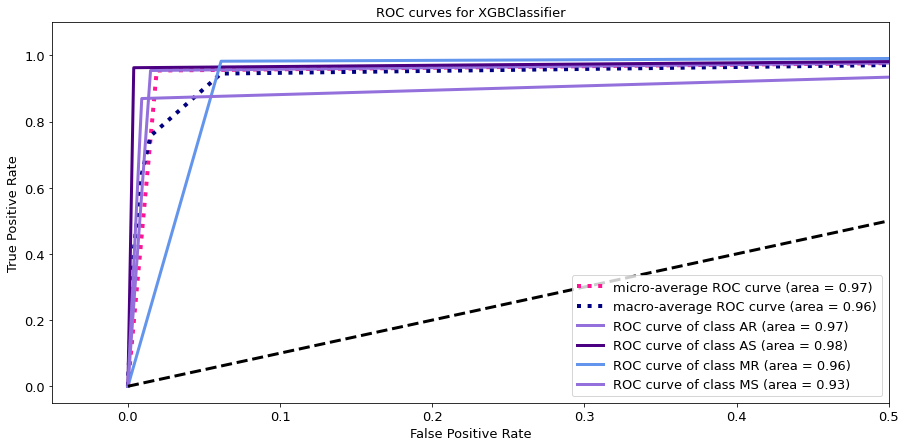

In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], yhat_f[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid.ravel(), yhat_f.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes = 4
class_names = ["AR", "AS", "MR", "MS"]

from itertools import cycle
lw =3

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (15, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["mediumpurple", "indigo", "cornflowerblue"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0.0, 0.5], [0.0, 0.5], "k--", lw=lw)
plt.xlim([-0.05, 0.5])
plt.xticks(fontsize=13)
plt.ylim([-0.05, 1.1])
plt.yticks(fontsize=13)
plt.xlabel("False Positive Rate",fontsize = 13 )
plt.ylabel("True Positive Rate", fontsize = 13)
plt.title("ROC curves for XGBClassifier",fontsize = 13)
plt.legend(loc="lower right", fontsize = 13) 
plt.show()

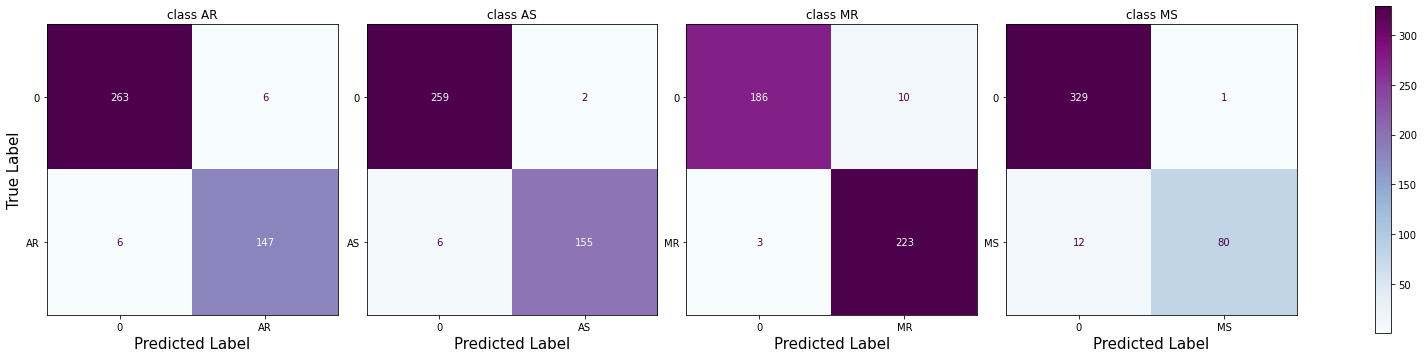

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

f, axes = plt.subplots(1, 4, figsize=(28, 15))
axes = axes.ravel()
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_valid_[:, i],
                                                   yhat[:, i]),
                                  display_labels=[0, i])
    if i == 0:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel('True Label', fontsize = 15)
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
        
    else:
        disp.plot(ax=axes[i], values_format='.4g' , cmap = 'BuPu')
        disp.ax_.set_title(f'class {class_names[i]}')
        disp.ax_.set_xlabel('Predicted Label', fontsize =15)
        disp.ax_.set_ylabel(' ')
        disp.ax_.set_xticklabels([0,class_names[i]])
        disp.ax_.set_yticklabels([0,class_names[i]])
        disp.im_.colorbar.remove()
      
        

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes, shrink= 0.4)

plt.show()

In [31]:
cr_y1_ = classification_report(y_valid[:,0],yhat_f[:,0]) # AR
cr_y2_ = classification_report(y_valid[:,1],yhat_f[:,1]) # AS
cr_y3_ = classification_report(y_valid[:,2],yhat_f[:,2]) #mr
cr_y4_ = classification_report(y_valid[:,3],yhat_f[:,3]) #MS

print (cr_y1_)
print (cr_y2_)
print (cr_y3_)
print (cr_y4_)



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       269
           1       0.97      0.95      0.96       153

    accuracy                           0.97       422
   macro avg       0.97      0.97      0.97       422
weighted avg       0.97      0.97      0.97       422

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       261
           1       0.99      0.96      0.98       161

    accuracy                           0.98       422
   macro avg       0.99      0.98      0.98       422
weighted avg       0.98      0.98      0.98       422

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       196
           1       0.95      0.98      0.97       226

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422

              preci